# Behavioral Cloning
Team FoROS

**Behavioral Cloning Project**

The goals / steps of this project are the following:
* Use the simulator to collect data of good driving behavior
* Build a convolution neural network in Keras that predicts traction commands from images
* Train the model 
* Test that the model successfully drives around track 

### Model Architecture and Training Strategy

#### 1. An appropriate model architecture has been employed

For training, it was used the nvidia model:

https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/

The model includes RELU layers to introduce nonlinearity and the data is normalized in the model using a Keras lambda layer (code line 101). 

#### 2. Attempts to reduce overfitting in the model

The model was trained and validated (code line 38) on different data sets to ensure that the model was not overfitting. The model was tested by running it through the simulator and ensuring that the vehicle could stay on the track.

#### 3. Model parameter tuning

The model used an adam optimizer, so the learning rate was not tuned manually.

### Model Architecture and Training Strategy

#### 1. Solution Design Approach

To solve the ROSI Challenge 2019, our team decide use a behavioral clonning approach. So, our first step was to use a convolution neural network model, similar to the nvidia model. This model was used to drive a selfdriving car for NVIDIA team.

After choosing the model and build the software structure, the next step was to run the simulator to see how well the robot could drive around the track. There were a few spots where the robot fell off the track. To improve the driving behavior in these cases, we recorded data in many situation: starting position, avoiding obstacles, and so on. 

At the end of the process, the robot was able to drive autonomously around the track without leaving the road and avoiding obstacles.

#### 2. Final Model Architecture

As described in (https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/), the model has 9 layers. In the first layer, it was used a normaliation function. After that, it was used 5 convolutions layers for feature extractions. As described in nvidia's blog, that layers were chosen by many tests. 

The final model architecture is presented below:

# Nvidea model
```sh
model = Sequential()
model.add(Lambda(lambda x: x/255.0-0.5, input_shape=(64,64,3)))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))
```

#### 4. Creation of the Training Set & Training Process

A good dataset is critical for any CNN application, so, our team had to drive a lot! We had two available cams, the first one is the Kinect RGB cam, and the second one is the ur5 cam, in the robot's arm. So, we decided using both information to train our CNN, because the Kinect cam could "see" obstacles and the ur5 cam could see the platform. To use both informations, we decided to concatenate both cams images, as follow:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('rgb_data_93.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

#### 4. Image Processing

Before trainning our CNN model, we done some processing techniques to try improve our CNN model. So, we created the function process as follow:

```sh
def preprocess(img):
    image = cv2.GaussianBlur(img, (3,3), 0)
    image = cv2.resize(image, (64,64), interpolation=cv2.INTER_AREA)
    proc_img = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)	# cv2 loads images as BGR
    return proc_img
```

1. It is possible to see that first, we use a gaussianBlur function with a 3x3 kernel size to reduce noises. 
2. After, we resize the image to a 64,64 one to reduce memory usage during the training of our model.
3. After all, it was used a YUV color space transformation, as presented in the NVIDIA's paper.

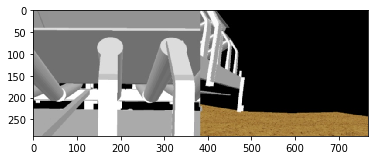

In [2]:
img = cv2.imread('rgb_data_93.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cv2.GaussianBlur(img, (3,3), 0)
plt.imshow(img)
plt.show()

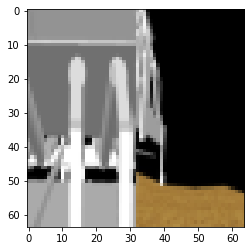

In [3]:
image = cv2.resize(image, (64,64), interpolation=cv2.INTER_AREA)
plt.imshow(image)
plt.show()

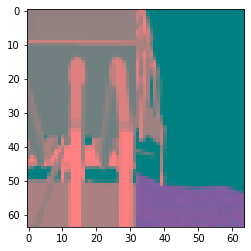

In [4]:
proc_img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV) 
plt.imshow(proc_img)
plt.show()

The traction commands were recorded in a csv file, as follow:

In [5]:
import pandas as pd 
data = pd.read_csv("driving_log.csv") 
data.head()

,Image 1,Image 2,Traction 1,Traction 2,Traction 3,Traction 4
0,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,13.356348,13.314071,12.709188,12.697905
1,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,12.998436,12.961170,12.483612,12.481384
2,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,12.998436,12.961170,12.483612,12.481384
3,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,12.260839,12.232995,12.217522,12.231009
4,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,/home/raphaell/catkin_ws_ROSI/src/rosi_defy/sc...,12.647337,12.612083,12.267685,12.269763


#### 5. Fire and Rolls detection

To detect fire and rolls we used some image processing and color detection. Besides that, it was used a centroid calculation to detect the center of countors, as follow:

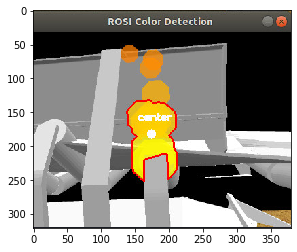

In [6]:
img = cv2.imread('fireDetection.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

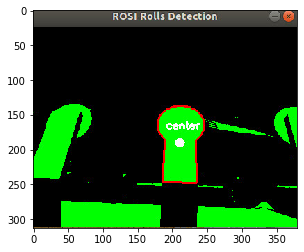

In [7]:
img = cv2.imread('rollsDetection.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#### 5. Mapping

To track trajectory, we used the GPS signal from the robot. We generate a 2D map with GPS points. Also, in this map, we plot the detected fire, as we can see bellow:

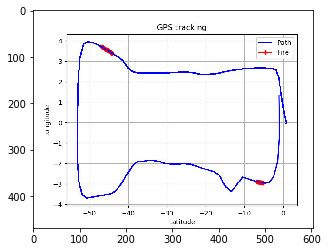

In [8]:
img = cv2.imread('map.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()